In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model_path = "ckpts/sft_sciq_llama7B/checkpoint_01000/hf_model/"

# eval_log_probs = np.load(model_path + "eval_log_probs.npy")
eval_log_probs2 = np.load(model_path + "eval_log_probs2.npy") 

# eval_correct_preds = np.load(model_path + "train_correct_preds.npy")


In [83]:
model_path = "ckpts/sft_sciq_llama7B/checkpoint_01500/hf_model/"

eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy")
# eval_correct_preds = np.load(model_path + "eval_correct_preds.npy")

In [84]:
probability_bins = [0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]

probabitities = []

A_to_D_likelihoods = {}
A_to_D_likelihoods["A"] = []
A_to_D_likelihoods["B"] = []
A_to_D_likelihoods["C"] = []
A_to_D_likelihoods["D"] = []

A_to_D_likelihood_stds = {}
A_to_D_likelihood_stds["A"] = []
A_to_D_likelihood_stds["B"] = []
A_to_D_likelihood_stds["C"] = []
A_to_D_likelihood_stds["D"] = []
for i in range(len(probability_bins) - 1):
    bin_idxs = np.where((np.e**eval_log_probs2 > probability_bins[i]) & (np.e**eval_log_probs2 < probability_bins[i+1]))[0]
    A_to_D_likelihoods["A"].append(eval_A_to_D_probs[bin_idxs, 0].mean())
    A_to_D_likelihoods["B"].append(eval_A_to_D_probs[bin_idxs, 1].mean())
    A_to_D_likelihoods["C"].append(eval_A_to_D_probs[bin_idxs, 2].mean())
    A_to_D_likelihoods["D"].append(eval_A_to_D_probs[bin_idxs, 3].mean())

    A_to_D_likelihood_stds["A"].append(eval_A_to_D_probs[bin_idxs, 0].std())
    A_to_D_likelihood_stds["B"].append(eval_A_to_D_probs[bin_idxs, 1].std())
    A_to_D_likelihood_stds["C"].append(eval_A_to_D_probs[bin_idxs, 2].std())
    A_to_D_likelihood_stds["D"].append(eval_A_to_D_probs[bin_idxs, 3].std())
    probabitities.append(np.e**eval_log_probs2[bin_idxs].mean())


Text(0, 0.5, 'Predicted likelihoods (A to D)')

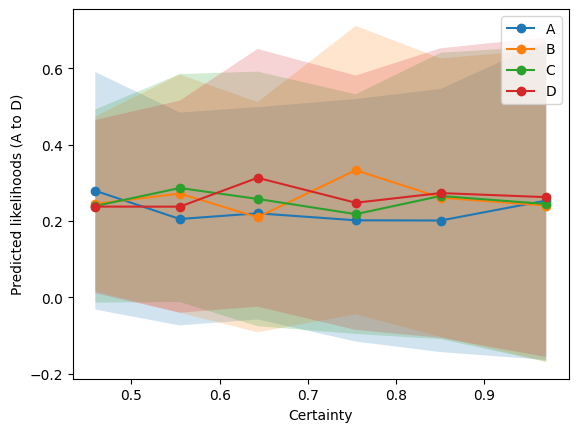

In [85]:
# plt.errorbar(probabitities, A_to_D_likelihoods["A"], yerr=A_to_D_likelihood_stds["A"], label="A")
# plt.errorbar(probabitities, A_to_D_likelihoods["B"], yerr=A_to_D_likelihood_stds["B"], label="B")
# plt.errorbar(probabitities, A_to_D_likelihoods["C"], yerr=A_to_D_likelihood_stds["C"], label="C")
# plt.errorbar(probabitities, A_to_D_likelihoods["D"], yerr=A_to_D_likelihood_stds["D"], label="D")

plt.plot(probabitities, A_to_D_likelihoods["A"], "o-", label="A")
plt.fill_between(probabitities, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.2)
plt.plot(probabitities, A_to_D_likelihoods["B"], "o-", label="B")
plt.fill_between(probabitities, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
plt.plot(probabitities, A_to_D_likelihoods["C"], "o-", label="C")
plt.fill_between(probabitities, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
plt.plot(probabitities, A_to_D_likelihoods["D"], "o-", label="D")
plt.fill_between(probabitities, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

plt.legend()

plt.xlabel("Certainty")

plt.ylabel("Predicted likelihoods (A to D)")

In [76]:
eval_answers = np.load(model_path + "eval_answers.npy")

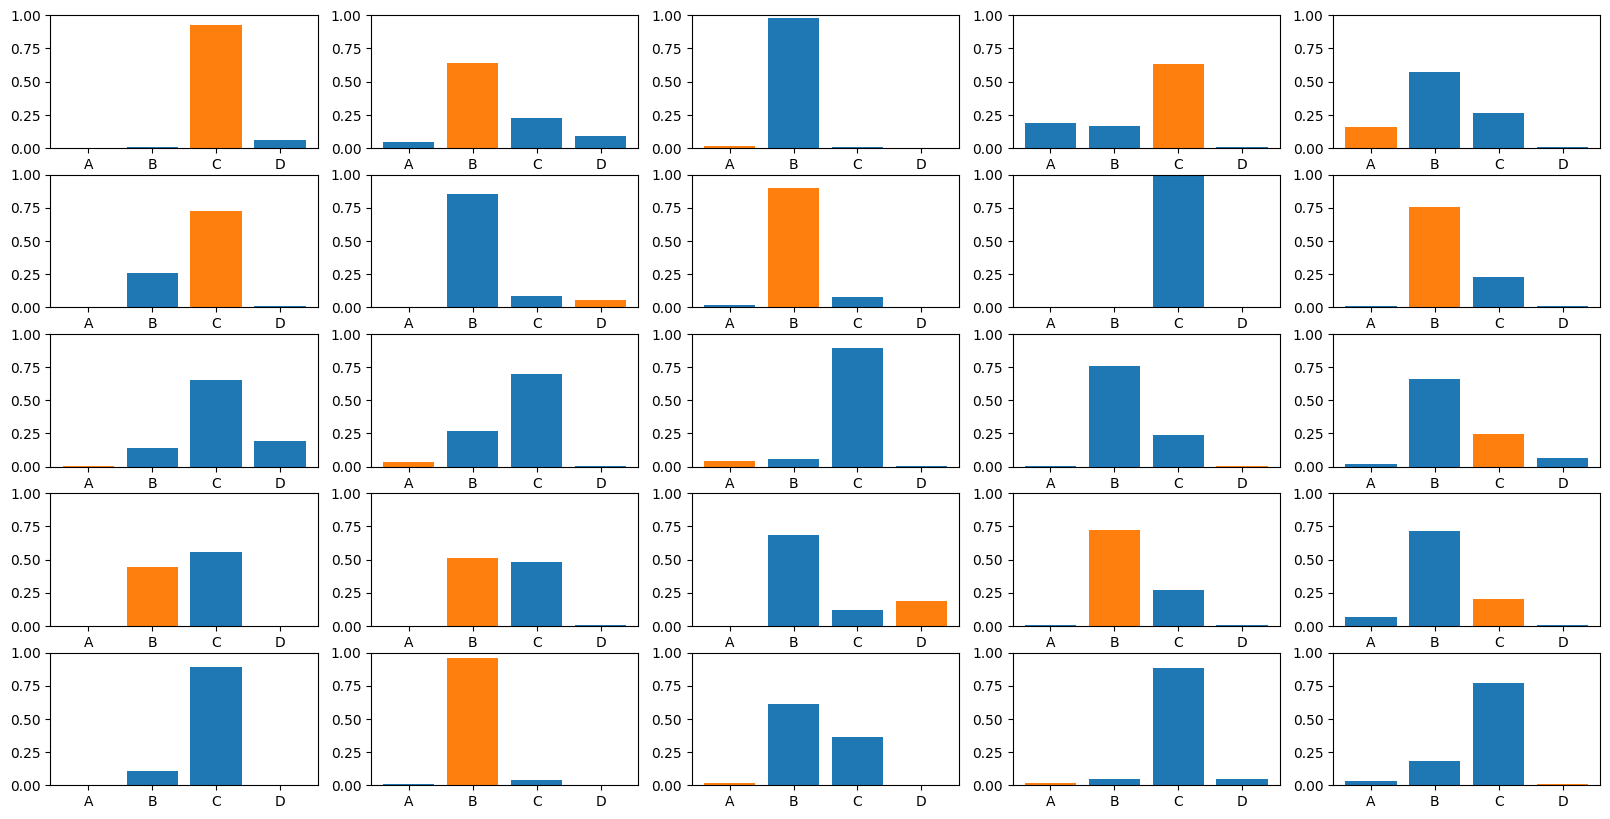

In [82]:
bin_idxs = np.where((np.e**eval_log_probs2 > 0.4) & (np.e**eval_log_probs2 < 0.5))[0]
eval_A_to_D_probs[bin_idxs]

# make 5 x 5 subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 10))



for i in range(5):
    for j in range(5):
        color = ["C0", "C0", "C0", "C0"]
        if eval_answers[bin_idxs[i*5+j]] == "A":
            color[0] = "C1"
        elif eval_answers[bin_idxs[i*5+j]] == "B":
            color[1] = "C1"
        elif eval_answers[bin_idxs[i*5+j]] == "C":
            color[2] = "C1"
        elif eval_answers[bin_idxs[i*5+j]] == "D":
            color[3] = "C1"

        axs[i, j].bar(["A", "B", "C", "D"], eval_A_to_D_probs[bin_idxs[i*5+j]], color=color)
        axs[i, j].set_ylim([0, 1])

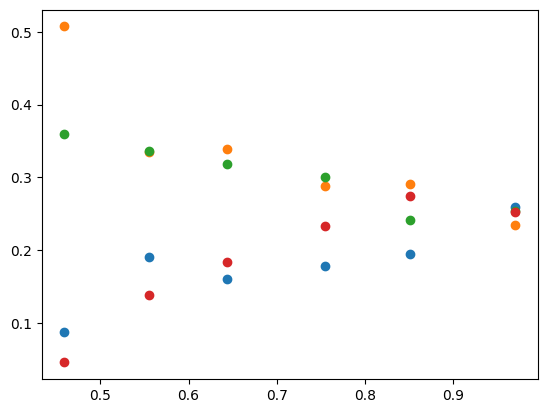

In [21]:
plt.scatter(probabitities, A_to_D_likelihoods["A"], label="A")
plt.scatter(probabitities, A_to_D_likelihoods["B"], label="B")
plt.scatter(probabitities, A_to_D_likelihoods["C"], label="C")
plt.scatter(probabitities, A_to_D_likelihoods["D"], label="D")

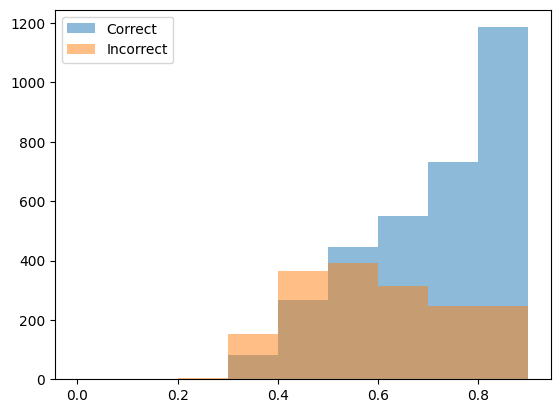

In [49]:
correct_idxs = np.where(eval_correct_preds == 1)[0]
incorrect_idxs = np.where(eval_correct_preds == 0)[0]

plt.hist(np.e**eval_log_probs2[correct_idxs], bins=np.arange(0, 1, 0.1), alpha=0.5, label="Correct")
plt.hist(np.e**eval_log_probs2[incorrect_idxs],bins=np.arange(0, 1, 0.1), alpha=0.5, label="Incorrect")
plt.legend()

(array([ 19.,  20.,  36.,  51.,  62.,  44.,  61.,  80., 123., 504.]),
 array([0.32115927, 0.38899347, 0.45682768, 0.52466188, 0.59249609,
        0.6603303 , 0.7281645 , 0.79599871, 0.86383292, 0.93166712,
        0.99950133]),
 <BarContainer object of 10 artists>)

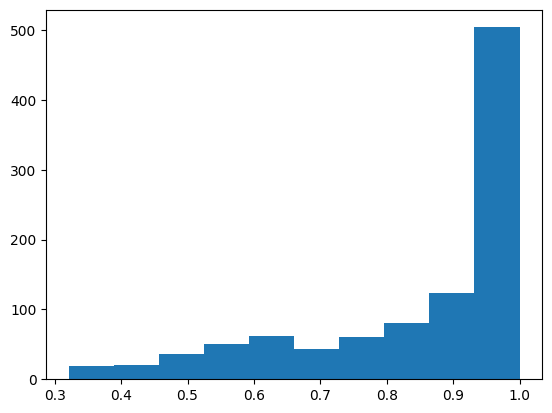

In [27]:
plt.hist(np.e**eval_log_probs2)

In [47]:
len(np.where(np.e**eval_log_probs2 > 0.934)[0]) / len(eval_log_probs2)

0.5054371093415532

In [49]:
probability_bins = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

probabitities = []
accuracies = []
for i in range(len(probability_bins) - 1):
    bin_idxs = np.where((np.e**eval_log_probs2 > probability_bins[i]) & (np.e**eval_log_probs2 < probability_bins[i+1]))[0]
    print("Bin: ", probability_bins[i], probability_bins[i+1], "Accuracy: ", np.mean(eval_correct_preds[bin_idxs]))
    probabitities.append(probability_bins[i]+0.05)
    accuracies.append(np.mean(eval_correct_preds[bin_idxs]))


Bin:  0.4 0.5 Accuracy:  0.39473684210526316
Bin:  0.5 0.6 Accuracy:  0.6621621621621622
Bin:  0.6 0.7 Accuracy:  0.6753246753246753
Bin:  0.7 0.8 Accuracy:  0.7701149425287356
Bin:  0.8 0.9 Accuracy:  0.7933884297520661
Bin:  0.9 1 Accuracy:  0.9620689655172414


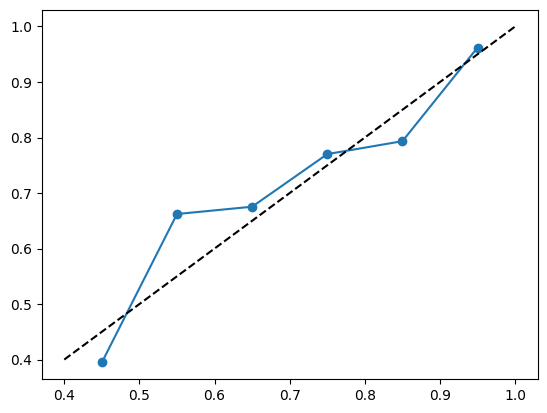

In [50]:
plt.plot(probabitities, accuracies, "o-")
plt.plot([0.4, 1], [0.4, 1], "k--")

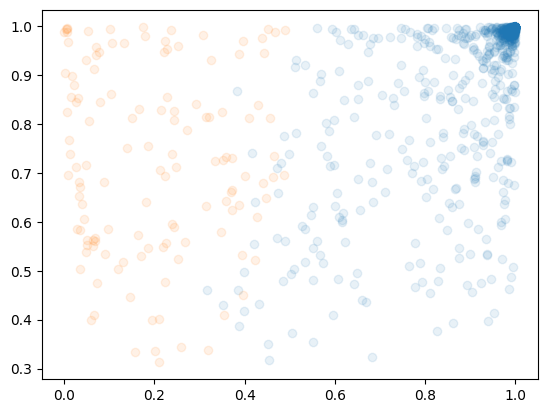

In [10]:
plt.scatter(np.e**eval_log_probs[correct_idxs], np.e**eval_log_probs2[correct_idxs], alpha=0.1)
plt.scatter(np.e**eval_log_probs[incorrect_idxs], np.e**eval_log_probs2[incorrect_idxs], alpha=0.1)